In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_pickle("clean_data.pkl")

In [3]:
df

,Ethnicity,Age,Education,Gender,HHIncome,Alcohol,HyperHist,CholHist,ChestPain,Shortness,...,Waist,HDL,Tryglicerides,LDL,TChol,FoodFastHours,SessionTime,LBXGLU,Systolic,Diastolic
SEQN,,,,,,,,,,,,,,,,,,,,,
41475.0,5.0,62.0,2.0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,...,156.0,47.0,NaN,NaN,179.0,7.0,1.0,NaN,123.333333,60.666667
41477.0,3.0,71.0,2.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,...,110.0,34.0,NaN,NaN,191.0,2.0,1.0,NaN,144.666667,52.666667
41479.0,1.0,52.0,1.0,1.0,3.0,0.0,0.0,NaN,0.0,0.0,...,95.0,47.0,99.0,121.0,188.0,14.0,0.0,113.0,108.666667,67.333333
41481.0,4.0,21.0,2.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN,...,80.0,NaN,NaN,NaN,NaN,12.0,0.0,NaN,109.333333,64.000000
41482.0,1.0,64.0,2.0,1.0,4.0,1.0,1.0,0.0,0.0,1.0,...,117.0,43.0,NaN,NaN,158.0,1.0,1.0,NaN,116.000000,76.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102949.0,3.0,33.0,2.0,1.0,2.0,NaN,0.0,0.0,NaN,NaN,...,86.0,73.0,NaN,NaN,201.0,7.0,1.0,NaN,122.000000,76.666667
102952.0,5.0,70.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,82.0,60.0,78.0,43.0,119.0,14.0,0.0,158.0,139.333333,73.333333
102953.0,1.0,42.0,2.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,115.0,49.0,NaN,NaN,182.0,6.0,1.0,NaN,120.666667,75.333333


In [4]:
df.columns

Index(['Ethnicity', 'Age', 'Education', 'Gender', 'HHIncome', 'Alcohol',
       'HyperHist', 'CholHist', 'ChestPain', 'Shortness', 'DiabAge',
       'DiabHist', 'Frozen', 'FastFood', 'ReadytoEat', 'MealsOut', 'Milk',
       'KidneyStones', 'WeakKidneys', 'UrineLeak', 'Suicidality', 'FeltDown',
       'FeltBad', 'HoursWorked', 'Dental', 'Pesticides', 'ModRec', 'WalkBike',
       'VigRec', 'ModWork', 'VigWork', 'PregnantEver', 'PregnantNow',
       'HoursSlept', 'Smoke100', 'SmokeNow', 'MaxWeight', 'Pulse', 'Weight',
       'ArmCirc', 'BMI', 'LegLen', 'ArmLen', 'Waist', 'HDL', 'Tryglicerides',
       'LDL', 'TChol', 'FoodFastHours', 'SessionTime', 'LBXGLU', 'Systolic',
       'Diastolic'],
      dtype='object')

In [5]:
columns =  ['Ethnicity', 'Age', 'Education', 'Gender', 'HHIncome', 'Alcohol',
       'HyperHist', 'CholHist', 'ChestPain', 'Shortness', 'DiabAge',
       'DiabHist', 'Frozen', 'FastFood', 'ReadytoEat', 'MealsOut', 'Milk',
       'KidneyStones', 'WeakKidneys', 'UrineLeak', 'Suicidality', 'FeltDown',
       'FeltBad', 'HoursWorked', 'Dental', 'Pesticides', 'ModRec', 'WalkBike',
       'VigRec', 'ModWork', 'VigWork', 'PregnantEver', 'PregnantNow',
       'HoursSlept', 'Smoke100', 'SmokeNow', 'MaxWeight', 'Pulse', 'Weight',
       'ArmCirc', 'BMI', 'LegLen', 'ArmLen', 'Waist', 'FoodFastHours',
       'SessionTime',  'Systolic', 'Diastolic']

df = df[columns].copy()

# Engineering the Target Variables

### Create the Hypertension target variable

First let us visualise the columns constructing the target variable, the diastolic and systolic blood pressure, colored by the SP past hypertension diagnosis.

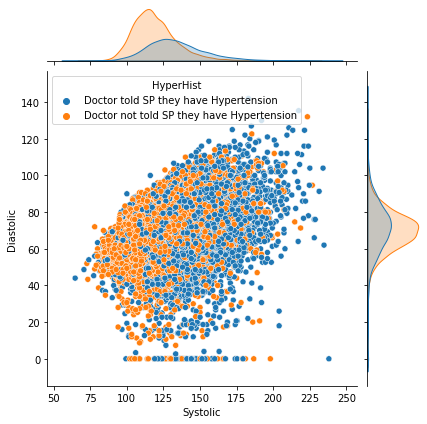

In [6]:
df1 = df.copy()
df1.loc[df1['HyperHist'] == 0,'HyperHist'] = 'Doctor not told SP they have Hypertension'
df1.loc[df1['HyperHist'] == 1,'HyperHist'] = 'Doctor told SP they have Hypertension'
ax = sns.jointplot(data = df1, x = 'Systolic',y = 'Diastolic',hue = 'HyperHist') 


1. Observing the histogram plots on the sides we see that the systolic blood pressure correlates much more strongly with the SPs history of hypertension than does diastolic blood pressure. Indeed, the distribution of diastolic blood pressure for SPs told they have hypertension seems quite similar to the diastolic blood pressure distribution for SPs not told they have hypertension. We will evaluate predictive models for both 'HyperSystolic' as well as 'HyperDiastolic' to see which may be best predicted.


2. Note the presence of SPs with extreme low Systolic / Diastolic pressure. This can be due to complicating diseases such as artial stiffness, excess adipose tissue, or other complicating factors which inhibits the readings from the prescribed device. Consulting the documentation of the Systolic and Diastolic readings we find the rigorous survey methods indicate to record such unlikely results when they do occur.


Viewing the density plot on the sides of the scatterplot show that such very low readings are very rare and can be resonably dropped from our data.

We will remove these very low readings from the data.


Now we define the Hypertension Target variable, based on the guidelines for diagnosing hypertension from blood pressure readings.

  * 0 -- Non-Hypertensive
  * 1 -- Hypertensive

In [7]:

# First we drop small values of Systolic and Diastolic readings
df.drop(df[ ((df['Systolic'] < 90) | (df['Diastolic'] < 50))].index,inplace = True)


# Let us add a new feature encoding Non-Hypertensive and Hypertensive
 
df.loc[(df.Systolic < 130),'HyperSystolic'] = 0
df.loc[(df.Systolic >= 130),'HyperSystolic'] = 1


df.loc[(df.Diastolic < 80),'HyperDiastolic'] = 0
df.loc[(df.Diastolic >= 80),'HyperDiastolic'] = 1


df.loc[(df.Diastolic >= 80) | (df.Systolic >= 130) ,'Hypertensive'] = 1
df.loc[(df.Diastolic < 80) & (df.Systolic < 130) ,'Hypertensive'] = 0


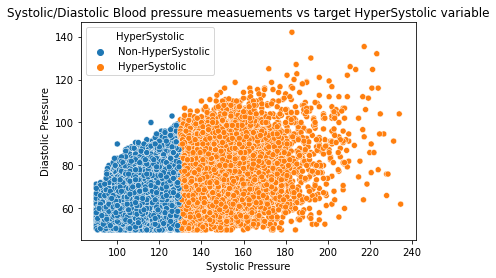

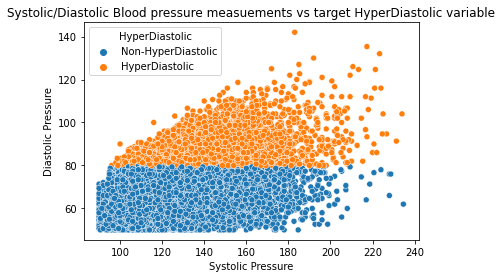

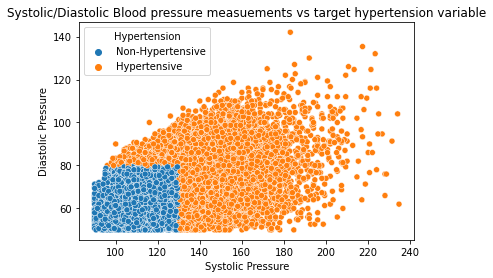

In [8]:
# Let us repeat the above visualization to see the effect:

ax = sns.scatterplot(data = df, x = 'Systolic',y = 'Diastolic',hue = 'HyperSystolic')
ax.legend_.set_title('HyperSystolic') 
ax.set_xlabel('Systolic Pressure')
ax.set_ylabel('Diastolic Pressure')
HS_labels = ['Non-HyperSystolic','HyperSystolic']
for t, l in zip(ax.legend_.texts, HS_labels): t.set_text(l)
ax.set_title('Systolic/Diastolic Blood pressure measuements vs target HyperSystolic variable')
plt.show()

ax = sns.scatterplot(data = df, x = 'Systolic',y = 'Diastolic',hue = 'HyperDiastolic')
ax.legend_.set_title('HyperDiastolic') 
ax.set_xlabel('Systolic Pressure')
ax.set_ylabel('Diastolic Pressure')
HD_labels = ['Non-HyperDiastolic','HyperDiastolic']
for t, l in zip(ax.legend_.texts, HD_labels): t.set_text(l)
ax.set_title('Systolic/Diastolic Blood pressure measuements vs target HyperDiastolic variable')
plt.show()


ax = sns.scatterplot(data = df, x = 'Systolic',y = 'Diastolic',hue = 'Hypertensive')
ax.legend_.set_title('Hypertension') 
ax.set_xlabel('Systolic Pressure')
ax.set_ylabel('Diastolic Pressure')
HT_labels = ['Non-Hypertensive','Hypertensive']
for t, l in zip(ax.legend_.texts, HT_labels): t.set_text(l)
ax.set_title('Systolic/Diastolic Blood pressure measuements vs target hypertension variable')
plt.show()

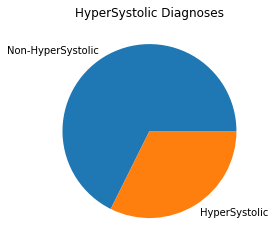

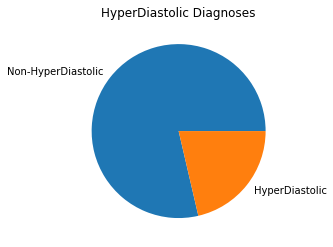

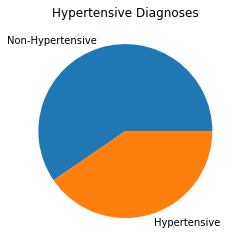

In [9]:
# Visualize the target variable: Diagnosis of Hypertension

diag_totals = df.HyperSystolic.value_counts().sort_index().to_numpy()
HS_perc = 100*diag_totals/diag_totals.sum()
fig1, ax1 = plt.subplots()
ax1.pie(HS_perc,labels = HS_labels)
ax1.set_title('HyperSystolic Diagnoses')
plt.show()

diag_totals = df.HyperDiastolic.value_counts().sort_index().to_numpy()
HD_perc = 100*diag_totals/diag_totals.sum()
fig1, ax1 = plt.subplots()
ax1.pie(HD_perc,labels = HD_labels)
ax1.set_title('HyperDiastolic Diagnoses')
plt.show()

diag_totals = df.Hypertensive.value_counts().sort_index().to_numpy()
HT_perc = 100*diag_totals/diag_totals.sum()
fig1, ax1 = plt.subplots()
ax1.pie(HT_perc,labels = HT_labels)
ax1.set_title('Hypertensive Diagnoses')
plt.show()

####  Hypertensive target features are imbalanced

The classes are imbalanced with respect to each target variable, we will balance the datasets by downsampling during the ML Algorithm phase.

In [10]:
#from sklearn.utils import resample

#df_np = df[(df.HyperDiastolic == 1) & (df.HyperSystolic == 0)]
#df_pn = df[(df.HyperDiastolic == 0) & (df.HyperSystolic == 1)]
#df_pp = df[(df.HyperDiastolic == 1) & (df.HyperSystolic == 1)]
#df_nn = df[(df.HyperDiastolic == 0) & (df.HyperSystolic == 0)]

#samples = min(df_pp.shape[0],df_nn.shape[0],df_pn.shape[0],df_np.shape[0])

#df_nn_dnsampled = resample(df_nn, replace=False, n_samples=samples)
#df_pn_dnsampled = resample(df_pn, replace=False, n_samples=samples)
#df_np_dnsampled = resample(df_np, replace=False, n_samples=samples)
#df_pp_dnsampled = resample(df_pp, replace=False, n_samples=samples)

#df = pd.concat([df_nn_dnsampled,df_pp_dnsampled,df_pn_dnsampled,df_np_dnsampled])

from sklearn.utils import resample

# Downsample the positive examples
df_positive = df[df.Hypertensive == 1]
df_negative = df[df.Hypertensive == 0]

samples = min(df_positive.shape[0],df_negative.shape[0])

df_neg_dnsampled = resample(df_negative, replace=False,
                            n_samples=samples)

df_pos_dnsampled = resample(df_positive, replace=False,
                            n_samples=samples)


df = pd.concat([df_neg_dnsampled,df_pos_dnsampled])



### Drop the Systolic and Diastolic measurements

These measurements were used to construct the target variable, using them in the machine learning model would be a source of data leakage.

In [11]:
df.drop(['Systolic','Diastolic'], axis = 1,inplace = True)
line = ('The downsampled dataset has {0} samples with {1} features, '
       'including the target variable.')
print(line.format(*df.shape))

The downsampled dataset has 30458 samples with 49 features, including the target variable.


In [12]:
# Let's view the features of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 30458 entries, 41475.0 to 102956.0
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ethnicity       30458 non-null  float64
 1   Age             30458 non-null  float64
 2   Education       30458 non-null  float64
 3   Gender          30458 non-null  float64
 4   HHIncome        28457 non-null  float64
 5   Alcohol         24128 non-null  float64
 6   HyperHist       30417 non-null  float64
 7   CholHist        27185 non-null  float64
 8   ChestPain       20354 non-null  float64
 9   Shortness       20328 non-null  float64
 10  DiabAge         3951 non-null   float64
 11  DiabHist        30437 non-null  float64
 12  Frozen          30414 non-null  float64
 13  FastFood        30430 non-null  float64
 14  ReadytoEat      30387 non-null  float64
 15  MealsOut        30436 non-null  float64
 16  Milk            30341 non-null  float64
 17  KidneyStones    3038

We can see that features Age, Education, Gender, Ethnicity, along with the target variable Hypertensive are the only columns with no missing data. We will have to impute the remaining values. Before we do this we will split the training and testing data.

## Prepare train and test data

The training data will be used to make decisions about feature engineering and data imputation etc.

In [13]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.1)

# Exploration and Imputation of the data

#### Binary data

First let us view the binary features.

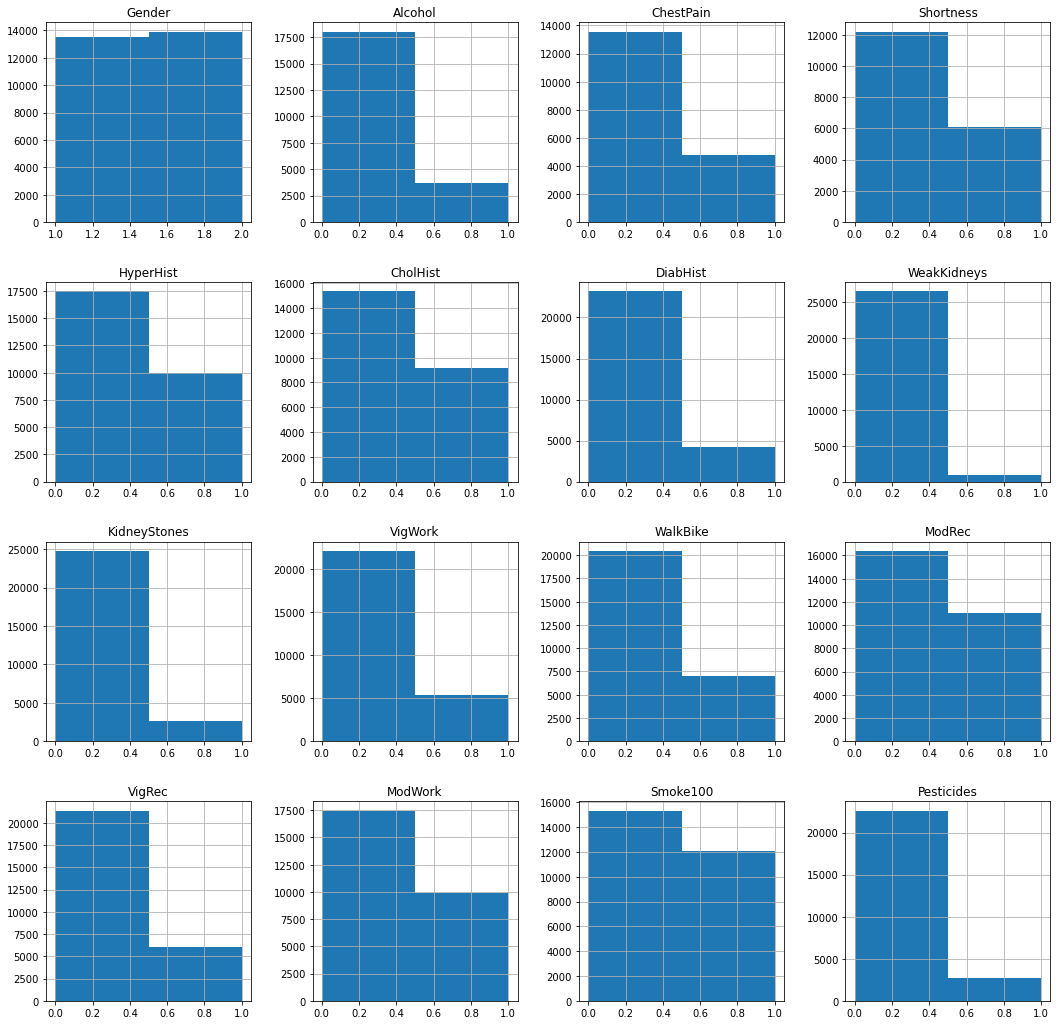

In [14]:
# Binary features
bin_feats = [ 'Gender', 'Alcohol', 'ChestPain', 'Shortness', 'HyperHist',
             'CholHist', 'DiabHist', 'WeakKidneys', 'KidneyStones', 'VigWork',
             'WalkBike', 'ModRec', 'VigRec', 'ModWork', 'Smoke100','Pesticides']

df_bin = df_train[bin_feats]
 

fig, axis = plt.subplots(4,4,figsize=(18, 18))
df_bin.hist(ax=axis,bins = 2)
plt.show()

The variance appears low for the WeakKidneys and KidneyStones features. Let us compare numerical values:

In [15]:
df_train[bin_feats].std(axis = 0)

Gender          0.499960
Alcohol         0.377131
ChestPain       0.438674
Shortness       0.471630
HyperHist       0.480745
CholHist        0.483680
DiabHist        0.361002
WeakKidneys     0.176791
KidneyStones    0.293066
VigWork         0.395736
WalkBike        0.435277
ModRec          0.490347
VigRec          0.414471
ModWork         0.480740
Smoke100        0.496458
Pesticides      0.311739
dtype: float64

The standard deviation of the KidneyStones variable is somewhat low, but the WeakKidneys standard deviation is quite low. Small variance might make a feature unimformative / hard to utilize while modeling. However, let us see how the proportions of Hypertensives vary with respect to a historical diagnosis of Weak Kidneys.

In [16]:
df_train.groupby('WeakKidneys')['Hypertensive'].mean()

WeakKidneys
0.0    0.400272
1.0    0.536199
Name: Hypertensive, dtype: float64

It appears the difference in proportions is non-trivial, so it seems like a good variable to keep. 

In [17]:
from scipy.stats import chi2_contingency
contingency = pd.crosstab(index=[df_train['WeakKidneys']], columns=df_train['Hypertensive'], margins=True)
p = chi2_contingency(contingency)[1] 

line = 'The chi squared score for WeakKidneys is {:.3e}, indicating a significant predictor.'
print(line.format(p))

The chi squared score for WeakKidneys is 1.917e-13, indicating a significant predictor.


Again, the demographic data is complete, let us see if it is possible (if there is enough data present) to impute missing values from the demographic data.

In [18]:
# The Gender feature is missing no data, so does not require imputation
bin_feats.remove('Gender')

In [19]:
demo = ['Education','Gender']

In [20]:
df_bin = df_train[demo  + ['Ethnicity'] + bin_feats]
print('Proportion of filled values for each demographic: ')
print(df_bin.groupby(by = demo).count().apply(lambda x:min(x)/max(x),axis = 1))
print('Number of total samples for each demographic: ')
print(df_bin.groupby(by = demo).count().max(axis = 1))

Proportion of filled values for each demographic: 
Education  Gender
1.0        1.0       0.714732
           2.0       0.625432
2.0        1.0       0.650284
           2.0       0.650510
3.0        1.0       0.663303
           2.0       0.651170
dtype: float64
Number of total samples for each demographic: 
Education  Gender
1.0        1.0       3204
           2.0       3185
2.0        1.0       7040
           2.0       7551
3.0        1.0       3270
           2.0       3162
dtype: int64


Per each demographic, and binary variable, there are at least 2193 samples with a proportion of 0.619 filled values, it is thus reasonable to use this demographic data to fill the missing binary values.

*(Note: The Ethnicity variable was included in the df_bin data frame, and this column is missing no data which is what allows us to use the above formula.)*

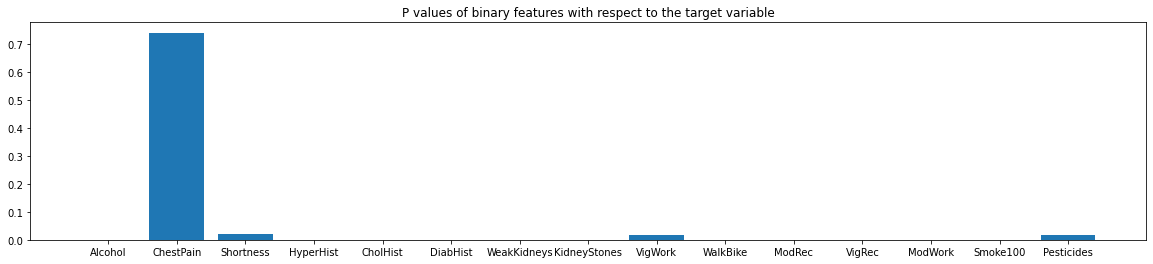

In [21]:
from scipy.stats import chi2_contingency

p_vals = {}
for feat in bin_feats:
    contingency = pd.crosstab(index=[df_train[feat]], columns=df_train['Hypertensive'], margins=True)
    p_vals[feat] = chi2_contingency(contingency)[1] 

plt.figure(figsize = (20,4))
plt.bar(*zip(*p_vals.items()))
#plt.yscale('log')
plt.title('P values of binary features with respect to the target variable')
plt.show()

The Chestpain, Shorness, and VigWork columns are are the least significant variables with respect to the Hypertensive variable, the remaining columns are significantly correlated with with the hypertension target variable.

In [22]:
from utils.Imputation import GroupImputer
for col in bin_feats:
    HHIncImputer = GroupImputer(demo,col,metric = 'mode')
    HHIncImputer.fit(df_train)
    df_train = pd.DataFrame(HHIncImputer.transform(df_train),columns = df_train.columns)
    df_test = pd.DataFrame(HHIncImputer.transform(df_test),columns = df_test.columns)

Note the imputation was trained on the df_train set and then applied to both the df_train and df_test sets to prevent data leakage.


#### Pregnancy features

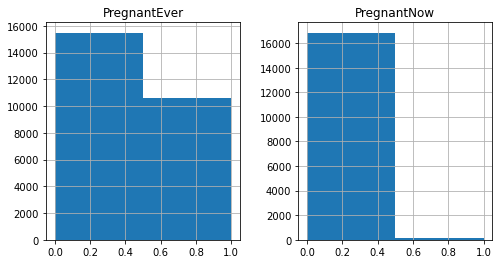

In [23]:
PregnancyFeats = ['PregnantEver', 'PregnantNow']

df_Pregnancy = df_train[PregnancyFeats]
 
fig, axis = plt.subplots(1,2,figsize=(8, 4))
df_Pregnancy.hist(ax=axis,bins = 2)
plt.show()

PregnantEver contains many more values than PregnantNow, let us see whether we should drop it.

In [24]:
for col in PregnancyFeats:
    contingency = pd.crosstab(index=[df_train[col]], columns=df_train['Hypertensive'], margins=True)
    p = chi2_contingency(contingency)[1] 

    line = 'The chi squared score for ' + col + ' is {:.3e}.'
    print(line.format(p))
    print('Proportion of hypertensive with respect to '+col+':')    
    print(df_train.groupby(col)['Hypertensive'].mean())
    print(df_train.groupby(col)['Hypertensive'].value_counts())
    print('\n')

The chi squared score for PregnantEver is 6.410e-02.
Proportion of hypertensive with respect to PregnantEver:
PregnantEver
0.0    0.415138
1.0    0.396685
Name: Hypertensive, dtype: float64
PregnantEver  Hypertensive
0.0           0.0             9056
              1.0             6428
1.0           0.0             6406
              1.0             4212
Name: Hypertensive, dtype: int64


The chi squared score for PregnantNow is 2.562e-17.
Proportion of hypertensive with respect to PregnantNow:
PregnantNow
0.0    0.392582
1.0    0.064171
Name: Hypertensive, dtype: float64
PregnantNow  Hypertensive
0.0          0.0             10235
             1.0              6615
1.0          0.0               175
             1.0                12
Name: Hypertensive, dtype: int64




Interestingly, current pregnancy seems to strongly correlate against hypertension. Although there are few overall SPs currently pregnant, we will keep the column.

In [25]:
for feat in PregnancyFeats:
    median = df_train[feat].median() 
    df_train.loc[df_train[feat].isna(), feat] = median
    df_test.loc[df_test[feat].isna(), feat] = median

#### Ordinal features

Let us now consider the ordinal variables: HHIncome, Milk, UrineLeak, Dental, SmokeNow.

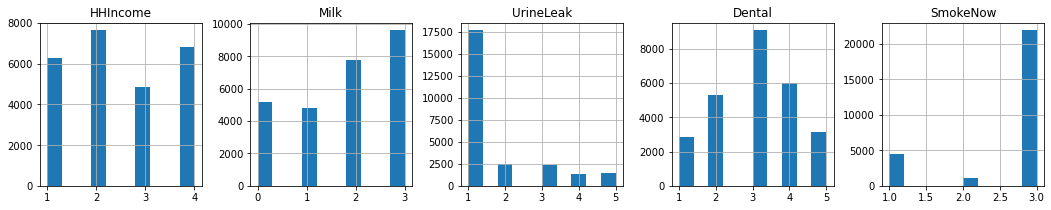

In [26]:
ord_feats = ['HHIncome','Milk','UrineLeak','Dental','SmokeNow']

df_ord = df_train[ord_feats]
 

fig, axis = plt.subplots(1,5,figsize=(18, 3))
df_ord.hist(ax=axis)
plt.show()

SmokeNow, which encodes whether the SP is currently smoking (Everyday/Some days/Not at all) seems to be most concentrated on a single variable. IE having a low entropy value. Let us calculate the entropy of each of these variables.

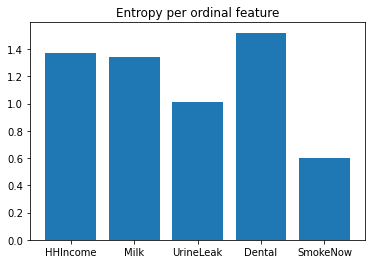

In [27]:
entropy = {}
for feat in ord_feats:
    vc = np.array(df_train[feat].value_counts(normalize=True, sort=False))
    # We use the MLE of entropy with Miller-Madow bias correction
    entropy[feat] = np.sum(-vc*np.log(vc)) + (len(vc) - 1)/df_train[feat].notna().sum()
    
plt.bar(*zip(*entropy.items()))
plt.title('Entropy per ordinal feature')
plt.show()

From this plot we can see all ordinal features have non appreciable entropy and likely make informative features for our model.

In [28]:
df_ord = df_train[demo  + ['Ethnicity'] + ord_feats]
print('Proportion of filled values for each demographic: ')
print(df_ord.groupby(by = demo).count().apply(lambda x:min(x)/max(x),axis = 1))
print('Number of total samples for each demographic: ')
print(df_ord.groupby(by = demo).count().max(axis = 1))

Proportion of filled values for each demographic: 
Education  Gender
1.0        1.0       0.906991
           2.0       0.883830
2.0        1.0       0.936222
           2.0       0.912992
3.0        1.0       0.935168
           2.0       0.912081
dtype: float64
Number of total samples for each demographic: 
Education  Gender
1.0        1.0       3204
           2.0       3185
2.0        1.0       7040
           2.0       7551
3.0        1.0       3270
           2.0       3162
dtype: int64


Again we see that each demographic category provide enough samples to make a simple imputation.

In [29]:
for col in ord_feats:
    OrdImputer = GroupImputer(demo, col, metric = 'mode')
    OrdImputer.fit(df_train)
    df_train = pd.DataFrame(OrdImputer.transform(df_train),columns = df_train.columns)
    df_test = pd.DataFrame(OrdImputer.transform(df_test),columns = df_test.columns)

#### Mental health data

We consider the three mental health columns and see whether all should be included.

In [30]:
MentalHealth = ['FeltDown','FeltBad','Suicidality']
df_MentalHealth = df_train[MentalHealth]

print(df_MentalHealth.groupby(by = ['FeltDown']).agg(['mean','count']))
df_MentalHealth.groupby(by = ['FeltDown','FeltBad']).agg(['mean','count'])

           FeltBad        Suicidality       
              mean  count        mean  count
FeltDown                                    
0.0       0.072541  18886    0.007042  18888
1.0       0.603197   4254    0.101551   4254
2.0       1.048263   1036    0.263006   1038
3.0       1.724479    911    0.643564    909


Suicidality       
                        mean  count
FeltDown FeltBad                   
0.0      0.0        0.004498  17785
         1.0        0.035477    902
         2.0        0.089286    112
         3.0        0.123457     81
1.0      0.0        0.043115   2273
         1.0        0.138422   1546
         2.0        0.213768    276
         3.0        0.391026    156
2.0      0.0        0.082324    413
         1.0        0.249071    269
         2.0        0.378601    243
         3.0        0.715596    109
3.0      0.0        0.206612    242
         1.0        0.467532    154
         2.0        0.650794    126
         3.0        0.984375    384

As could be expected, the mental health columns are correlated.

From the mean columns in the first table we can see that FeltBad and Suicidality are well correlated with FeltDown.

From the count columns in the second table we can see FeltBad is nearly diagonal with respect to FeltDown, the mean shows again a strong correlation of the mean of Suicidality to FeltDown and FeltBad.

As values are so correlated let us select the best correlated column and drop the rest

In [31]:
for col in MentalHealth:
    contingency = pd.crosstab(index=[df_train[col]], columns=df_train['Hypertensive'], margins=True)
    p = chi2_contingency(contingency)[1] 

    line = 'The chi squared score for ' + col + ' is {:.3e}.'
    print(line.format(p))

The chi squared score for FeltDown is 2.910e-01.
The chi squared score for FeltBad is 2.515e-03.
The chi squared score for Suicidality is 4.037e-01.


We see the FeltBad column is most significant with respect to hypertension so we will drop the other two.

In [32]:
df_train = df_train.drop(['FeltDown','Suicidality'],axis = 1)
df_test = df_test.drop(['FeltDown','Suicidality'],axis = 1)

# Impute missing values for FeltBad column
median = df_train['FeltBad'].median() 
df_train.loc[df_train['FeltBad'].isna(), 'FeltBad'] = median
df_test.loc[df_test['FeltBad'].isna(), 'FeltBad'] = median

#### Dietary data

Next let us turn to dietary data.

Histogram plots:


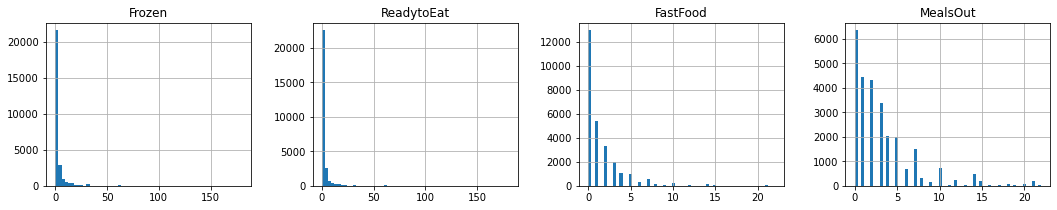

Number of missing values: 


Frozen        41
ReadytoEat    65
FastFood      24
MealsOut      19
dtype: int64

In [33]:
diet = ['Frozen', 'ReadytoEat', 'FastFood', 'MealsOut']

df_diet = df_train[diet]
 

fig, axis = plt.subplots(1,4,figsize=(18, 3))
df_diet.hist(ax=axis,bins = 60)
#axis[0].set_yscale('log'); axis[1].set_yscale('log'); axis[2].set_yscale('log'); axis[3].set_yscale('log'); 
print('Histogram plots:')
plt.show()
print('Number of missing values: ')
df_diet.isna().sum()

Frozen and ReadytoEat are extremely biased towards zero, to simplify the model, we will transform them to binary features. FastFood and MealsOut are also a bit biased, we will attempt to make the data more uniform by a root transformation. 

In [34]:
df_train[['Frozen','ReadytoEat']] = (df_train[['Frozen','ReadytoEat']] > 0).astype(int)
df_test[['Frozen','ReadytoEat']] = (df_test[['Frozen','ReadytoEat']] > 0).astype(int) 

Sqrt transformed plots:


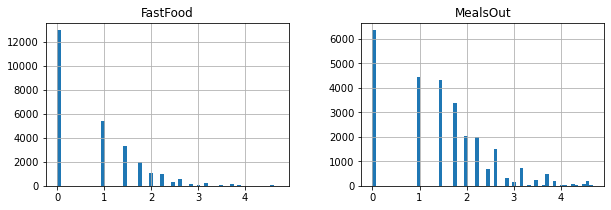

In [35]:
fig, axis = plt.subplots(1,2,figsize=(10, 3))
df_train[['FastFood','MealsOut']].apply(np.sqrt ).hist(ax=axis,bins = 60)
#axis[0].set_yscale('log'); axis[1].set_yscale('log'); axis[2].set_yscale('log'); axis[3].set_yscale('log'); 
print('Sqrt transformed plots:')
plt.show() 

The data is now slightly less skewed and thus might be better suited to parametric methods.

In [36]:
df_train[['FastFood','MealsOut']] = (df_train[['FastFood','MealsOut']] > 0).apply(np.sqrt)
df_test[['FastFood','MealsOut']] = (df_test[['FastFood','MealsOut']] > 0).apply(np.sqrt) 

All dietary data has few missing few values. Thus imputing the median will not affect the distribution.  

In [37]:
# Imputation by median of the training set.

for feat in diet:
    median = df_train[feat].median() 
    df_train.loc[df_train[feat].isna(), feat] = median
    df_test.loc[df_test[feat].isna(), feat] = median

#### HoursSlept and HoursWorked

Lets consider the HoursSlept and HoursWorked variables. The HoursSlept is best viewed as a heat map. The HoursWorked variable does not plot well as a heat map as there are a large portion of SPs working zero hours per week, so we will plot the median per Age.

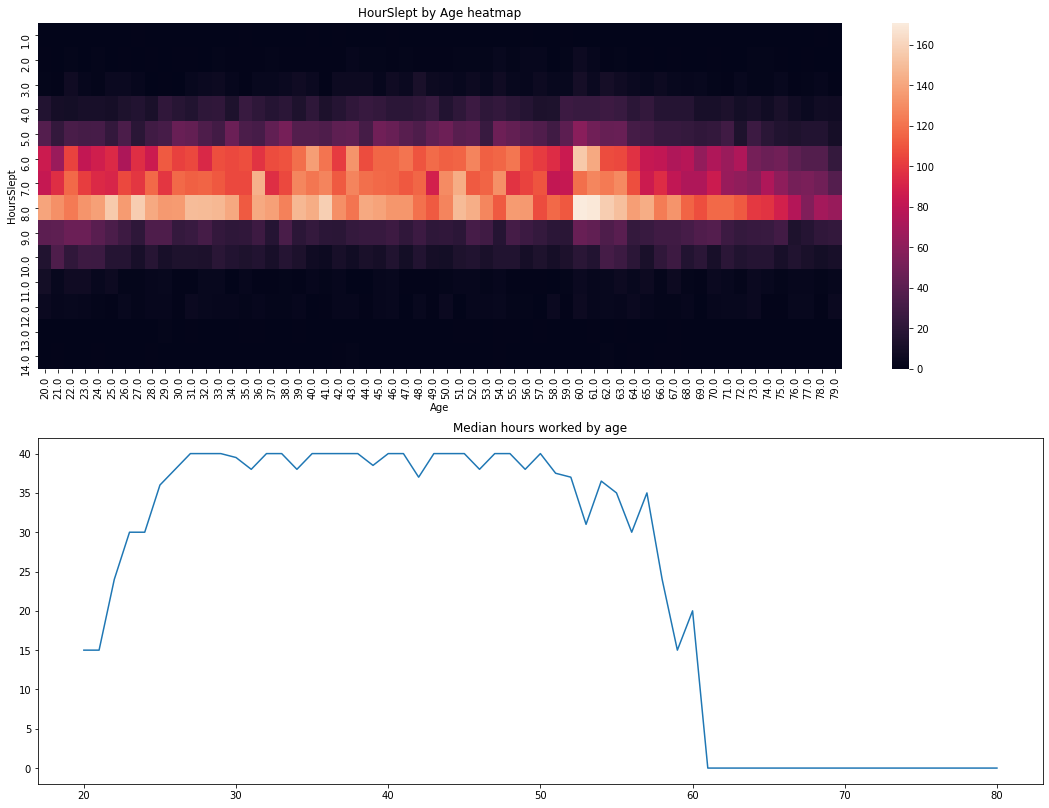

In [38]:
# As there is a large cluster of SPs with Age = 80, we will drop those values to improve the heatmap visualization.
df_train_young = df_train[df_train['Age'] < 80] 
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (18,14))
sns.heatmap(pd.crosstab( df_train_young['HoursSlept'],df_train['Age']),ax = ax1 )
ax1.set_title('HourSlept by Age heatmap')
ax2.plot(df_train[['Age','HoursWorked']].groupby(by = ['Age']).median())
ax2.set_title('Median hours worked by age')
plt.show()

HoursSlept is fairly constant over Age, so we can simply impute the uniform median. However, HoursWorked is clearly Age dependent, so we will attempt to impute the median per Age.

In [39]:
line = 'Each age value contains a minimum of {} values which is sufficient to impute a median.'
m = df_train[['Age','HoursWorked']].groupby(by = ['Age']).count().min()[0]
print(line.format(m))

Each age value contains a minimum of 188 values which is sufficient to impute a median.


In [40]:
median = df_train['HoursSlept'].median() 
df_train.loc[df_train['HoursSlept'].isna(), 'HoursSlept'] = median
df_test.loc[df_test['HoursSlept'].isna(), 'HoursSlept'] = median

WorkImputer = GroupImputer(['Age'], 'HoursWorked', metric = 'median')
WorkImputer.fit(df_train)
df_train = pd.DataFrame(WorkImputer.transform(df_train), columns = df_train.columns)
df_test = pd.DataFrame(WorkImputer.transform(df_test), columns = df_test.columns)

#### Numerical Values

Let us now consider the remaining numerical variables.

First let us consider the Weight and MaxWeight features:

The Weight feature is collected by measurement at time of survey, however the MaxWeight feature is collected by questionaire from the SP. We can see below that this leads to some discrepancy.

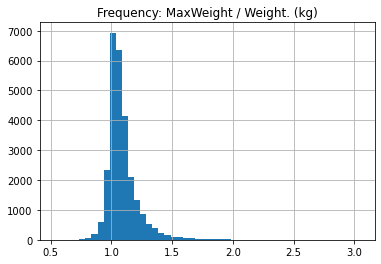

In [41]:
( df_train[ 'MaxWeight'] / df_train[ 'Weight'] ).hist(bins = 50)
plt.title('Frequency: MaxWeight / Weight. (kg)')
plt.show()

Clearly one's current weight cannot be greater than their maximum weight.

We correct the error by setting MaxWeight to Weight whenever Weight > MaxWeight.

In [42]:
df_train.loc[ df_train['Weight'] > df_train['MaxWeight'] ,'MaxWeight'] = df_train['Weight']
df_test.loc[ df_test['Weight'] > df_test['MaxWeight'] ,'MaxWeight'] = df_test['Weight']

Let us add weight ratio as a new feature.

In [43]:
df_train['MaxWeightRatio'] = df_train[ 'MaxWeight'] / df_train[ 'Weight'] 
df_test['MaxWeightRatio'] = df_test[ 'MaxWeight'] / df_test[ 'Weight']    

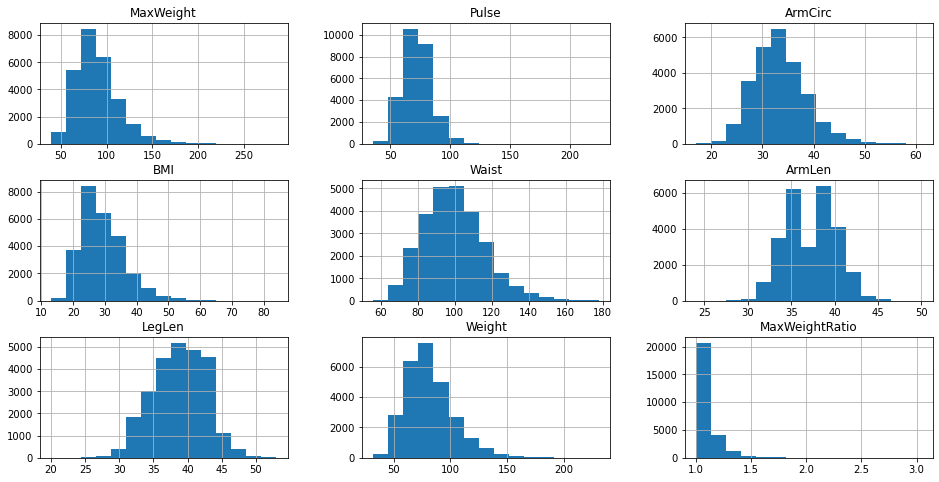

In [44]:
num_feats = ['MaxWeight','Pulse','ArmCirc','BMI','Waist','ArmLen','LegLen','Weight','MaxWeightRatio']

df_num = df_train[num_feats]
 

fig, axis = plt.subplots(3,3,figsize=(16, 8))
df_num.hist(ax=axis, bins = 15)
plt.show()

There is an obvious relation between Weight, MaxWeight, and MaxWeightRatio. Let's see if we can use an age based model to impute missing values.

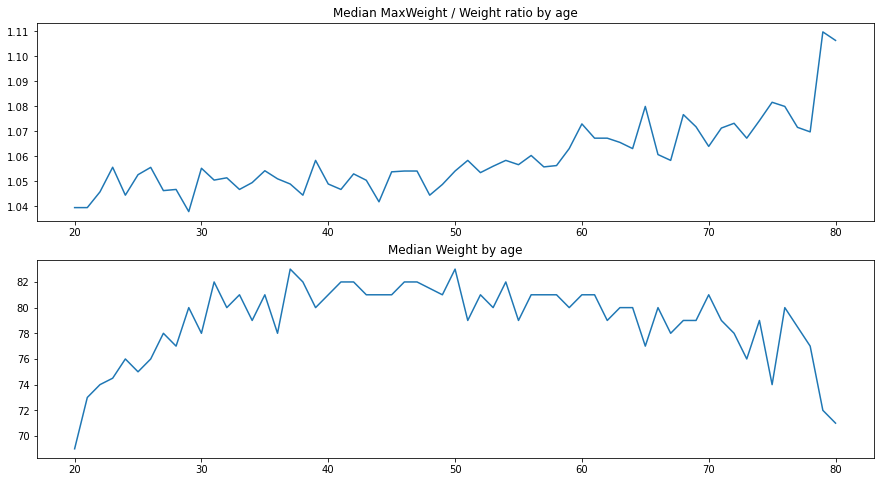

In [46]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (15,8))
ax1.plot(df_train[['Age','MaxWeightRatio']].groupby(by = ['Age']).median())
ax1.set_title('Median MaxWeight / Weight ratio by age')
ax2.plot(df_train[['Age','Weight']].groupby(by = ['Age']).median())
ax2.set_title('Median Weight by age')
plt.show()

As the data appears noisy, we will attempt to smooth it with centered rolling means.

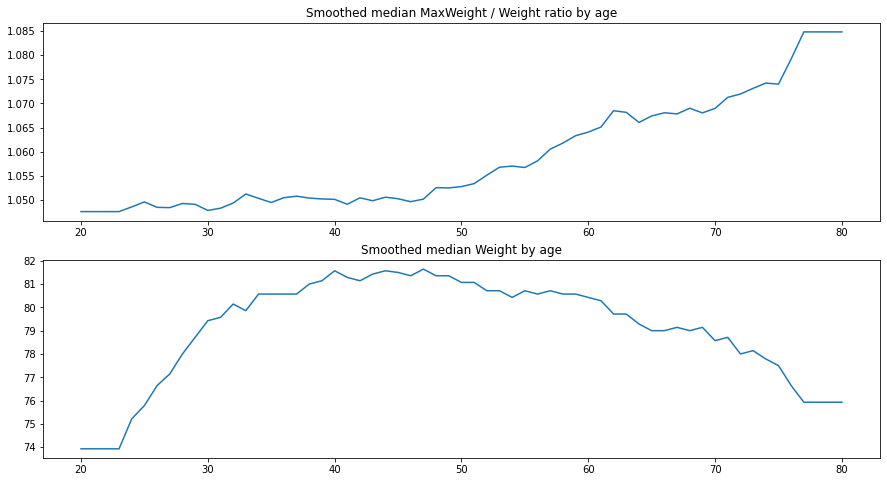

In [47]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (15,8))
df_A2MWR = df_train[['Age','MaxWeightRatio']].groupby(by = ['Age']).median().rolling(window = 7, center = True).mean()
df_A2MWR = df_A2MWR.interpolate(limit_direction = 'both')
ax1.plot(df_A2MWR)
ax1.set_title('Smoothed median MaxWeight / Weight ratio by age')
df_A2W = df_train[['Age','Weight']].groupby(by = ['Age']).median().rolling(window = 7, center = True).mean()
df_A2W = df_A2W.interpolate(limit_direction = 'both')
ax2.plot(df_A2W)
ax2.set_title('Smoothed median Weight by age')
plt.show()

Now let us use the age variable to impute the Weight and MaxWeightRatio columns. We will drop the MaxWeight column.

In [48]:
from utils.Imputation import ContinuousImputer
for col in ['Weight','MaxWeightRatio']:
    colImputer = ContinuousImputer('Age', col, 7)
    colImputer.fit(df_train)
    df_train = pd.DataFrame(colImputer.transform(df_train),columns = df_train.columns)
    df_test = pd.DataFrame(colImputer.transform(df_test),columns = df_test.columns)

df_train.drop(['MaxWeight'], axis = 1,inplace = True)
df_test.drop(['MaxWeight'], axis = 1,inplace = True)

Now let us consider whether the Pulse and Waist columns can be imputed from Age.

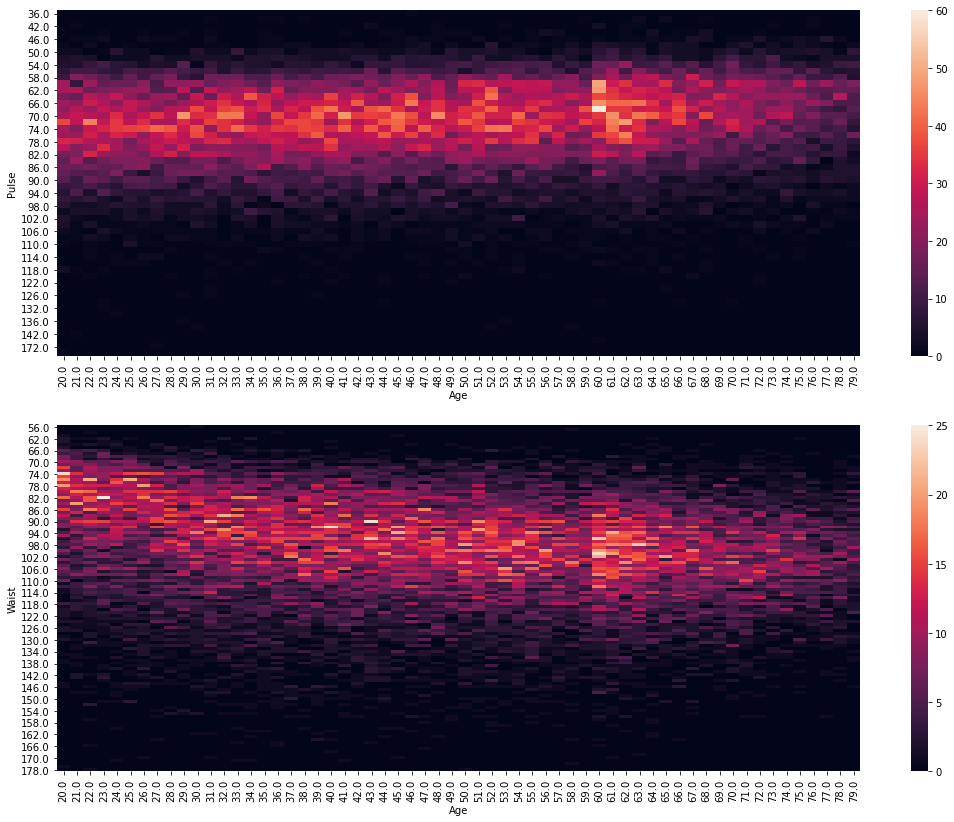

In [49]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (18,14))
sns.heatmap(pd.crosstab( df_train_young['Pulse'],df_train_young['Age']),ax = ax1 )
sns.heatmap(pd.crosstab( df_train_young['Waist'],df_train_young['Age']),ax = ax2 )
plt.show()

The heatmaps again suggest that Age is a decent variable to impute Pulse and Waist. We will apply this imputation next.

In [50]:
for col in ['Pulse','Waist']:
    colImputer = ContinuousImputer('Age', col, 7)
    colImputer.fit(df_train)
    df_train = pd.DataFrame(colImputer.transform(df_train),columns = df_train.columns)
    df_test = pd.DataFrame(colImputer.transform(df_test),columns = df_test.columns)

Let us see if the ArmCirc and BMI can be imputed from the Waist column

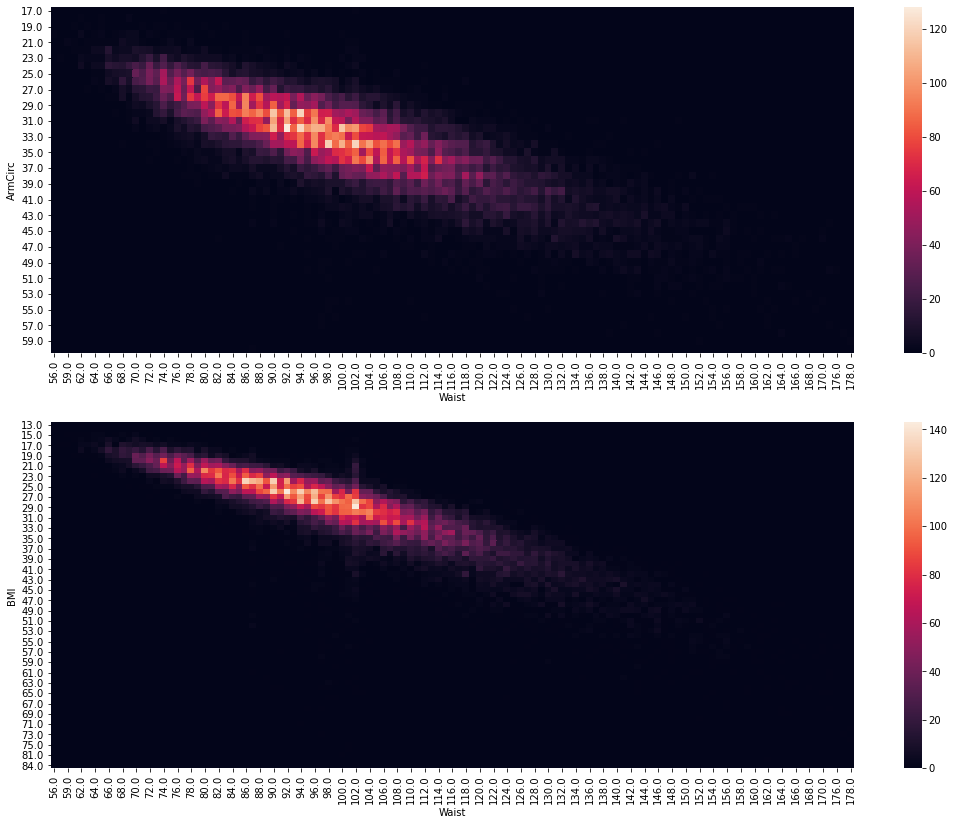

In [51]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (18,14))
sns.heatmap(pd.crosstab( df_train['ArmCirc'],df_train['Waist']),ax = ax1 )
sns.heatmap(pd.crosstab( df_train['BMI'],df_train['Waist']),ax = ax2 )
plt.show()

These appear to have a strong even linear classification, so we will use this grouping for imputation.

In [52]:
for col in ['ArmCirc','BMI']:
    colImputer = ContinuousImputer('Waist', col, 7)
    colImputer.fit(df_train)
    df_train = pd.DataFrame(colImputer.transform(df_train),columns = df_train.columns)
    df_test = pd.DataFrame(colImputer.transform(df_test),columns = df_test.columns)

Finally, for ArmLen and LegLen, we will use the Gender variable to impute.

In [53]:
for col in ['ArmLen','LegLen']:
    colImputer = GroupImputer(['Gender'], col, 'median')
    colImputer.fit(df_train)
    df_train = pd.DataFrame(colImputer.transform(df_train),columns = df_train.columns)
    df_test = pd.DataFrame(colImputer.transform(df_test),columns = df_test.columns)

#### Food fast hours and Session time

The final numerical feat we consider is the hours of fasting before the survey and the survey time. It is not clear if these survey data should correlate with hypertension since this data is gathered at the time of the Blood Glucose Laboratory survey, rather than the Blood Pressure examination.

In [54]:
df_train.groupby(by = ['SessionTime'])[['FoodFastHours', 'Hypertensive']].agg(['mean','std','count'])

FoodFastHours                  Hypertensive                 
                     mean       std  count         mean       std  count
SessionTime                                                             
0.0             11.108538  3.366249  13000     0.387823  0.487272  13189
1.0              3.854917  4.534062   9884     0.416252  0.492961  10054
2.0              3.283138  3.470533   4104     0.431278  0.495314   4169

Here we can see the (mean of) FoodFastHours depends on the SessionTime (morning/afternoon/evening), to a lesser extent the rate of Hypertension does as well.

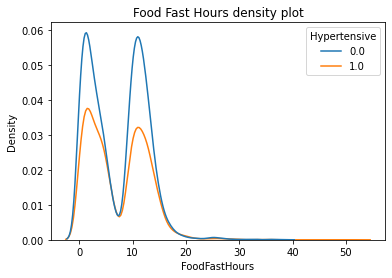

In [55]:
sns.kdeplot(data=df_train, x= "FoodFastHours", hue="Hypertensive")
plt.title('Food Fast Hours density plot')
plt.show()

It appears there is a bimodal distribution of the FoodFastHours, we can see that the mode depends on the session time by consulting the above groupby agg line. We will use the session time to impute the FoodFastHours time.

In [56]:
FFHImputer = GroupImputer(['SessionTime'], 'FoodFastHours', metric = 'median')
FFHImputer.fit(df_train)
df_train = pd.DataFrame(FFHImputer.transform(df_train),columns = df_train.columns)
df_test = pd.DataFrame(FFHImputer.transform(df_test),columns = df_test.columns)

#### Age at Diabetes diagnosis

Finally, we will consider the DiabAge column. Note not all SPs can be given a numeric value for this column, since many were not given a Diabetic diagnosis at any age. Thus we consider whether we can create 2 columns. One for a diabetes diagnosis at an age under the median and a second for a diabetes diagnosis at an age at or above the median.

In [57]:
DiabAgeMedian = df_train['DiabAge'].median()
df_train['DiabAgeYoung'] = (df_train['DiabAge'] < DiabAgeMedian).astype(int)
df_train['DiabAgeOld'] = (df_train['DiabAge'] >= DiabAgeMedian).astype(int)

df_test['DiabAgeYoung'] = (df_test['DiabAge'] < DiabAgeMedian).astype(int)
df_test['DiabAgeOld'] = (df_test['DiabAge'] >= DiabAgeMedian).astype(int)

df_train.drop(['DiabAge'], axis = 1,inplace = True)
df_test.drop(['DiabAge'], axis = 1,inplace = True)

To test these constructed columns, we will conduct a chi squared test (conditioned on having recieved a diabetes diagnosis).

In [58]:
contingency = np.zeros([2,2])
contingency[0,0] = ((df_train['DiabAgeYoung'] == 1) & (df_train['Hypertensive' ] == 1)).sum()
contingency[0,1] = ((df_train['DiabAgeOld'] == 1) & (df_train['Hypertensive' ] == 1)).sum()
contingency[1,0] = ((df_train['DiabAgeYoung'] == 1) & (df_train['Hypertensive' ] == 0)).sum()
contingency[1,1] = ((df_train['DiabAgeOld'] == 1) & (df_train['Hypertensive' ] == 0)).sum()
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingency) 
print('The p value for the chi shared test becomes {:.3e}, indicating a significant predictor.'.format(p))

The p value for the chi shared test becomes 1.506e-07, indicating a significant predictor.


#### Ethnicity

Now let us consider the Ethnicity column.

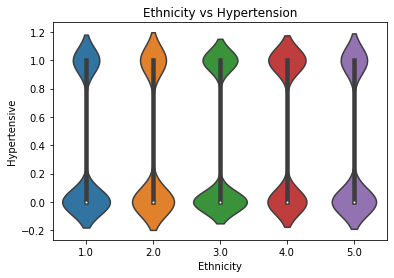

In [59]:
sns.violinplot(x = 'Ethnicity', y = 'Hypertensive', data = df_train )
plt.title('Ethnicity vs Hypertension')
plt.show()

In [60]:
contingency = pd.crosstab(index=[df_train['WeakKidneys']], columns=df_train['Hypertensive'], margins=True)
p = chi2_contingency(contingency)[1] 

line = 'The chi squared score for Ethnicity is {:.3e}, indicating a significant predictor.'
print(line.format(p))

The chi squared score for Ethnicity is 2.122e-13, indicating a significant predictor.


Finally we will OneHotEncode the Ethnicity column, the only categorical variable.

In [61]:
df_train = pd.get_dummies(df_train,columns = ['Ethnicity'],prefix = 'Eth')
df_test = pd.get_dummies(df_test,columns = ['Ethnicity'],prefix = 'Eth')
df_train.rename(columns =
                {'Eth_1.0':'MexAm','Eth_2.0':'Hisp','Eth_3.0':'White','Eth_4.0':'Black','Eth_5.0':'Other'},
               inplace = True)
df_test.rename(columns =
                {'Eth_1.0':'MexAm','Eth_2.0':'Hisp','Eth_3.0':'White','Eth_4.0':'Black','Eth_5.0':'Other'},
               inplace = True)
df_train = df_train.drop(['Other'], axis= 1)
df_test = df_test.drop(['Other'], axis=1)

In [62]:
df_train.to_pickle("HT_train.pkl")
df_test.to_pickle("HT_test.pkl")

In [63]:
df_train.isna().sum()

Age               0
Education         0
Gender            0
HHIncome          0
Alcohol           0
HyperHist         0
CholHist          0
ChestPain         0
Shortness         0
DiabHist          0
Frozen            0
FastFood          0
ReadytoEat        0
MealsOut          0
Milk              0
KidneyStones      0
WeakKidneys       0
UrineLeak         0
FeltBad           0
HoursWorked       0
Dental            0
Pesticides        0
ModRec            0
WalkBike          0
VigRec            0
ModWork           0
VigWork           0
PregnantEver      0
PregnantNow       0
HoursSlept        0
Smoke100          0
SmokeNow          0
Pulse             0
Weight            0
ArmCirc           0
BMI               0
LegLen            0
ArmLen            0
Waist             0
FoodFastHours     0
SessionTime       0
HyperSystolic     0
HyperDiastolic    0
Hypertensive      0
MaxWeightRatio    0
DiabAgeYoung      0
DiabAgeOld        0
MexAm             0
Hisp              0
White             0
